In [0]:
import torch
import torchvision
from torchvision import datasets, transforms


In [0]:

trainset = torchvision.datasets.MNIST(root='./data', 
                                      train=True,
                                      download=True, 
                                      transform=transforms.ToTensor())

testset = torchvision.datasets.MNIST(root='./data', 
                                     train=False,
                                     download=True, 
                                     transform=transforms.ToTensor())

train = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

test = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

In [0]:
print(len(list(trainset)))

60000


In [0]:
data[1]

tensor([3, 4, 5, 4, 2, 7, 3, 7, 1, 5, 4, 1, 7, 5, 1, 2, 9, 7, 0, 1, 0, 5, 4, 3,
        6, 9, 9, 0, 4, 5, 6, 7])

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class MNIST(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 64, 5, padding=(2, 2))
        self.conv3 = nn.Conv2d(64, 256, 3, padding = (1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MNIST()

if torch.cuda.is_available:
    model.cuda()

In [0]:
X = torch.rand(2, 1, 28, 28)
X = X.cuda()
outputs = model(X)
print(outputs)
print(torch.argmax(outputs, 1))
print(len(outputs))

tensor([[-0.0158, -0.0302, -0.0288,  0.0269,  0.0025,  0.0462,  0.0569, -0.0090,
         -0.0157, -0.0690],
        [-0.0146, -0.0331, -0.0301,  0.0212,  0.0039,  0.0440,  0.0552, -0.0097,
         -0.0177, -0.0659]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([6, 6], device='cuda:0', grad_fn=<NotImplemented>)
2


In [0]:
import torch.optim as optim

In [0]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [0]:
epochs = 2

for epoch in range(epochs):

    for i, (images, labels) in enumerate(train):
        if torch.cuda.is_available:
            X = images.cuda()
            y = labels.cuda()

        optimizer.zero_grad()

        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if i%500 == 499:
            correct = 0
            total = 0
            print('epoch: {} -- iteration: {} -- loss: {}'.format(epoch+1, i+1, loss))
            for j, (images, labels) in enumerate(train):
                if torch.cuda.is_available:
                    X = images.cuda()
                    y = labels.cuda()
                outputs = model(X)
                predicted = torch.argmax(outputs.data, 1)
                total += y.size(0)
                correct += (predicted == y).sum()
                accuracy = correct/total
            print('accuracy on the test set: {}'.format(100 * correct/total))

epoch: 1 -- iteration: 500 -- loss: 0.04785320162773132
accuracy on the test set: 99
epoch: 1 -- iteration: 1000 -- loss: 0.13865147531032562
accuracy on the test set: 99
epoch: 1 -- iteration: 1500 -- loss: 0.01023179292678833
accuracy on the test set: 99
epoch: 2 -- iteration: 500 -- loss: 0.31264787912368774
accuracy on the test set: 99
epoch: 2 -- iteration: 1000 -- loss: 0.0017963051795959473
accuracy on the test set: 99
epoch: 2 -- iteration: 1500 -- loss: 0.0004900693893432617
accuracy on the test set: 99


In [0]:
print(loss)

tensor(0.0402, device='cuda:0', grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0
test_losses = []
with torch.no_grad():
    for j, data in enumerate(test):
        images, labels = data
        if (torch.cuda.is_available):
            X = images.cuda()
            y = labels.cuda()

        outputs = model(X)


        if j%20 == 0:
            test_loss = loss = criterion(outputs, y)
            test_losses.append(test_loss)

        predicted = torch.argmax(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 99.000000 %


In [0]:
import matplotlib.pyplot as plt

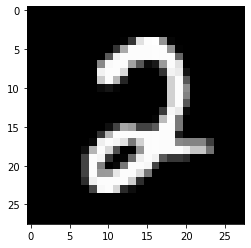

tensor(2, device='cuda:0')


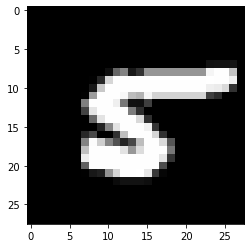

tensor(5, device='cuda:0')


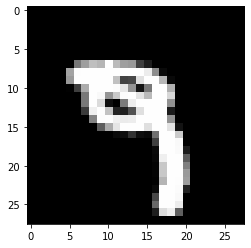

tensor(9, device='cuda:0')


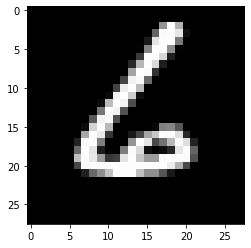

tensor(6, device='cuda:0')


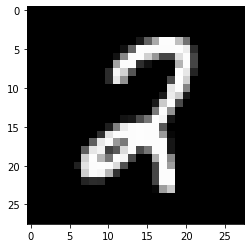

tensor(2, device='cuda:0')


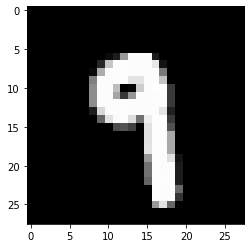

tensor(9, device='cuda:0')


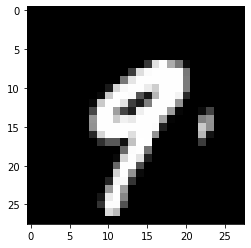

tensor(9, device='cuda:0')


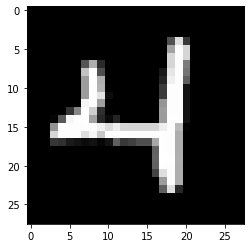

tensor(4, device='cuda:0')


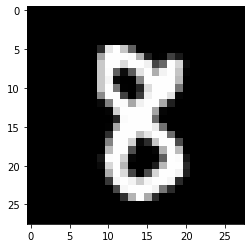

tensor(8, device='cuda:0')


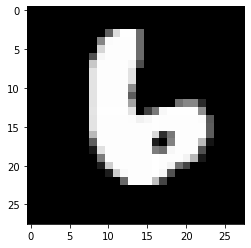

tensor(6, device='cuda:0')


In [0]:
for i in range(10): 
    show_img = images[i].view(28,28)
    plt.imshow(show_img, cmap = 'gray')
    plt.show()
    print(predicted[i])